In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from math import sqrt, log
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

## Chargement des données

In [2]:
# Lecture des données

data=pd.read_csv('./Datatrain/test_requete_features.csv')
data=data.drop(['Unnamed: 0'],axis=1)

# Vérification du contenu
data.head()

,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,556,175,60,copenhagen,30,hungarian,0,6217,Boss Western,J.Halliday Inn,1,0,0
1,664,284,111,copenhagen,30,hungarian,0,6217,Accar Hotels,Safitel,0,1,0
2,96,124,37,copenhagen,30,hungarian,0,6217,Boss Western,Boss Western,0,0,0
3,865,277,107,copenhagen,30,hungarian,0,6217,Chillton Worldwide,Chill Garden Inn,1,1,0
4,58,203,65,copenhagen,30,hungarian,0,6217,Yin Yang,Royal Lotus,1,0,2


In [3]:
len(data)

112375

In [4]:
## Peut être enlever les variables comme hotel_id, avatar_id ? 

data.describe()

,hotel_id,price,stock,date,mobile,avatar_id,parking,pool,children_policy
count,112375.000000,112375.000000,112375.000000,112375.000000,112375.000000,112375.000000,112375.000000,112375.000000,112375.000000
mean,499.065762,154.157001,60.165090,25.577086,0.535101,37272.050705,0.437953,0.172111,0.066394
std,287.991977,76.665386,61.268925,13.748032,0.498769,15820.812649,0.496137,0.377479,0.304650
min,0.000000,38.000000,0.000000,2.000000,0.000000,6217.000000,0.000000,0.000000,0.000000
25%,250.000000,96.000000,8.000000,11.000000,0.000000,34258.000000,0.000000,0.000000,0.000000
50%,502.000000,139.000000,42.000000,31.000000,1.000000,34264.000000,0.000000,0.000000,0.000000
75%,748.000000,190.000000,95.000000,37.000000,1.000000,34429.000000,1.000000,0.000000,0.000000
max,998.000000,547.000000,284.000000,44.000000,1.000000,73371.000000,1.000000,1.000000,2.000000


## Analyse descriptive

### Distribution de la variable à prédire 'price'

Text(0.5, 1.0, 'Distribution of price after log transform')

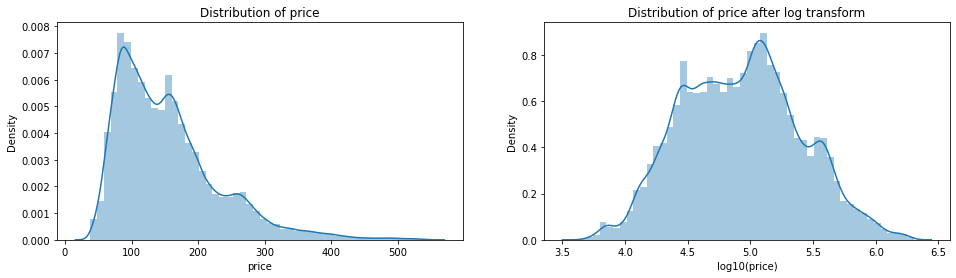

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 4))
sns.distplot(data["price"], ax=ax1)
ax1.set_title('Distribution of price')

data["log_price"]=data["price"].map(lambda x : log(x))
sns.distplot(data["log_price"].rename('log10(price)'), ax=ax2)
ax2.set_title('Distribution of price after log transform')

### Distribution des variables quantitatives

Text(0.5, 1.0, 'Distribution of date')

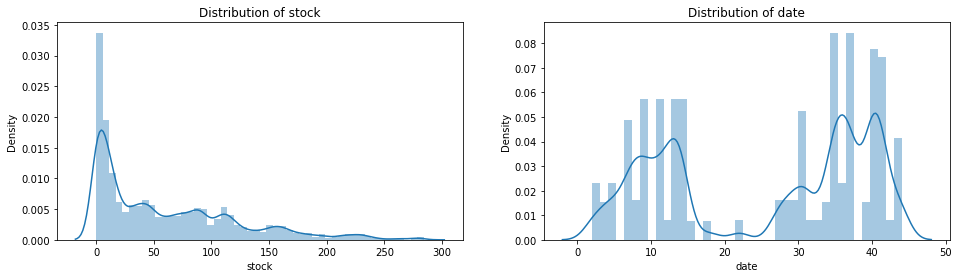

In [6]:
numerical=['stock','date']

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 4))
sns.distplot(data["stock"], ax=ax1)
ax1.set_title('Distribution of stock')


## Date peut être pas pertinent ? 
sns.distplot(data["date"], ax=ax2)
ax2.set_title('Distribution of date')

In [7]:
data[numerical].corr()

,stock,date
stock,1.000000,0.769171
date,0.769171,1.000000


### Distribution variables qualitatives

In [8]:
list_parking=data["parking"].tolist()
list_parking2=[list_parking.count(0),list_parking.count(1)]

list_pool=data["pool"].tolist()
list_pool2=[list_pool.count(0),list_pool.count(1)]

list_children=data["children_policy"].tolist()
list_children2=[list_children.count(0),list_children.count(1),list_children.count(2)]

list_mobile=data["mobile"].tolist()
list_mobile2=[list_mobile.count(0),list_mobile.count(1)]


Text(0.5, 1.0, 'mobile')

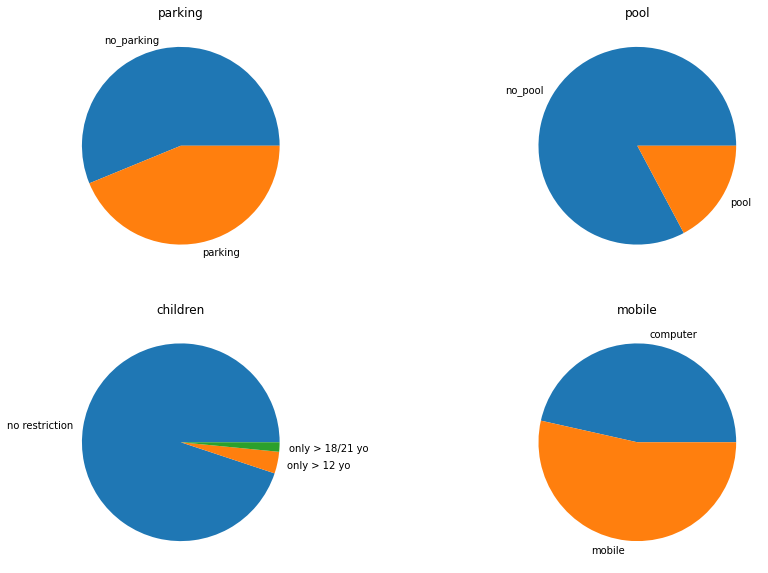

In [9]:
fig, axis = plt.subplots(2,2,figsize=(15,10))
axis[0,0].pie(list_parking2, labels = ['no_parking','parking'])
axis[0,0].set_title('parking')

axis[0,1].pie(list_pool2, labels = ['no_pool','pool'])
axis[0,1].set_title('pool')

axis[1,0].pie(list_children2, labels = ['no restriction','only > 12 yo','only > 18/21 yo' ])
axis[1,0].set_title('children')

axis[1,1].pie(list_mobile2, labels = ['computer','mobile'])
axis[1,1].set_title('mobile')

### Distribution du prix par rapport aux variables qualitatives

In [10]:
## Comprend pas pourquoi ça ne fonctionne pas de tous les afficher d'un coup ? 


# fig, axis = plt.subplots(2,2,figsize=(20,15))
# sns.boxplot(x=data["parking"], y=data["price"]).set(xlabel=None)
# axis[0,0].set_title('parking')

# sns.boxplot(x=data["pool"], y=data["price"]).set(xlabel=None)
# axis[0,1].set_title('pool')

# sns.boxplot(x=data["children_policy"], y=data["price"]).set(xlabel=None)
# axis[1,0].set_title('children')

# sns.boxplot(x=data["mobile"], y=data["price"]).set(xlabel=None)
# axis[1,1].set_title('mobile')

[Text(0.5, 0, '')]

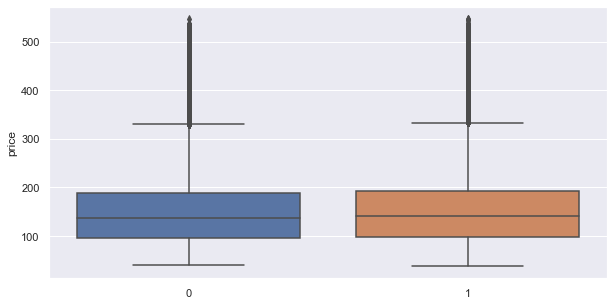

In [11]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data["parking"], y=data["price"]).set(xlabel=None)

[Text(0.5, 0, '')]

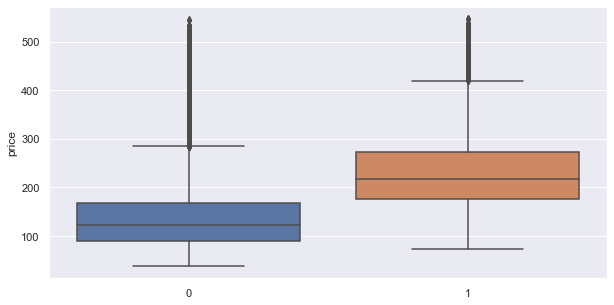

In [12]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data["pool"], y=data["price"]).set(xlabel=None)

[Text(0.5, 0, '')]

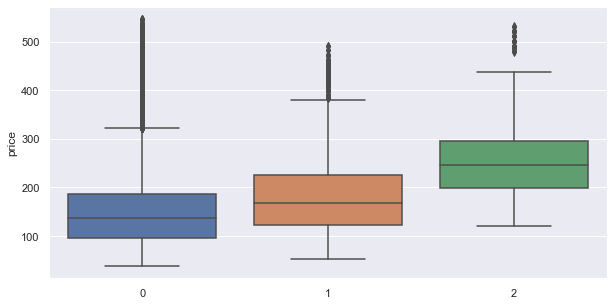

In [13]:
# Est-ce que l’hôtel a des restrictions concernant les enfants. 2 si l’hôtel interdit les enfants de moins de 18 ou 21 ans, 
# 1 si l’hôtel interdit les enfants de moins de 12 ans, 0 s’il autorise les enfants sans restrictions.

sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data["children_policy"], y=data["price"]).set(xlabel=None)

[Text(0.5, 0, '')]

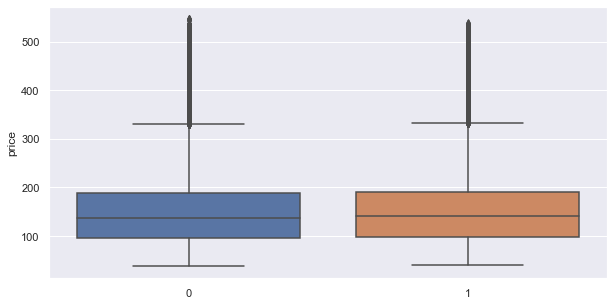

In [14]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data["mobile"], y=data["price"]).set(xlabel=None)

## Modele

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV, LassoLarsCV
from itertools import cycle
from sklearn.linear_model import lasso_path
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [16]:
data=data.drop(['log_price','avatar_id'],axis=1)

In [17]:
## equivalent méthode OneHotEncoding, a potentiellement modifier
## pour ne pas avoir de string 


data=pd.get_dummies(data, columns=['city', 'language', 'group', 'brand'])

In [18]:
data

,hotel_id,price,stock,date,mobile,parking,pool,children_policy,city_amsterdam,city_copenhagen,...,brand_Ibas,brand_Independant,brand_J.Halliday Inn,brand_Marcure,brand_Morriot,brand_Navatel,brand_Quadrupletree,brand_Royal Lotus,brand_Safitel,brand_Tripletree
0,556,175,60,30,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,664,284,111,30,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,96,124,37,30,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,865,277,107,30,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,58,203,65,30,0,1,0,2,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112370,794,211,155,35,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112371,204,58,33,35,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
112372,765,61,35,35,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
112373,451,110,85,35,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [19]:
price=data['price']
X_train, X_test, Y_train, Y_test = train_test_split(data,price,test_size=0.25,random_state=11)
X_train=X_train.drop(['price'],axis=1)
X_test=X_test.drop(['price'],axis=1)

In [20]:
X_train.head()

,hotel_id,stock,date,mobile,parking,pool,children_policy,city_amsterdam,city_copenhagen,city_madrid,...,brand_Ibas,brand_Independant,brand_J.Halliday Inn,brand_Marcure,brand_Morriot,brand_Navatel,brand_Quadrupletree,brand_Royal Lotus,brand_Safitel,brand_Tripletree
8432,277,166,35,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20966,212,193,44,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
55957,182,118,41,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
107992,413,192,35,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10285,624,63,28,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
# scaler = StandardScaler()  
# scaler.fit(X_train)  
# Xr_train = scaler.transform(X_train)  
# # Meme transformation sur le test
# Xr_test = scaler.transform(X_test)

In [22]:
param=[{"max_features":list(range(2,10))}]
regrf= GridSearchCV(DecisionTreeRegressor(),param,cv=5,n_jobs=-1)
regrfOpt=regrf.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (regrfOpt.best_score_,regrfOpt.best_params_))

Ypred_regrf = regrfOpt.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_regrf,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_regrf))


Meilleur score = 0.950579, Meilleur paramètre = {'max_features': 9}
MSE :  254.81480031323414
R2 :  0.9571254702694952


In [23]:
param=[{"max_depth":[1,2,3], "learning_rate":[0.1,0.5,1.0]}]
reggradboost = GridSearchCV(GradientBoostingRegressor(n_estimators=100), param, cv=10,n_jobs=-1)

reggradboost_Opt=reggradboost.fit(X_train, Y_train)

print("Meilleur score = %f, Meilleur paramètre = %s" % (reggradboost_Opt.best_score_,reggradboost_Opt.best_params_))

Ypred_gbreg = reggradboost_Opt.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_gbreg,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_gbreg))


Meilleur score = 0.963516, Meilleur paramètre = {'learning_rate': 1.0, 'max_depth': 3}
MSE :  224.89086365519125
R2 :  0.9621604003847078


#### Sans pénalisation

In [24]:
reg_lin = linear_model.LinearRegression()

reglin = reg_lin.fit(X_train,Y_train)
Ypred_reglin = reglin.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_reglin,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_reglin))

MSE :  634.369499244183
R2 :  0.8932625031119216


#### Avec pénalisation Lasso

In [25]:
param=[{"alpha":[0.05,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Ypred_regLasso=regLassOpt.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_regLasso,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_regLasso))

Meilleur R2 = 0.892210, Meilleur paramètre = {'alpha': 0.05}
MSE :  637.7878099281975
R2 :  0.8926873463201271


In [ ]:
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
regCoef=regLasso.fit(X_train,Y_train).coef_
print(regCoef)

In [ ]:
coef = pd.Series(regCoef, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

In [ ]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

In [ ]:
model = LassoCV(cv=5, alphas=np.array(range(1,50,1))/20.,n_jobs=-1,random_state=13).fit(X_train,Y_train)
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
# ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='MSE moyen', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: optimal par VC')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('MSE de chaque validation: coordinate descent ')
plt.show()

#### SVM Noyau linéaire

In [ ]:
param=[{"C":[0.01,0.03,0.05,0.1,0.2,0.3,0.5,1,1.2,1.5,1.7,2,3,4]}]
regsvm_l = GridSearchCV(SVR(kernel="linear"), param, cv=5, n_jobs=-1)  # try kernel="rbf" instead

regsvmOpt_l=regsvm_l.fit(X_train, Y_train)

print("Meilleur score = %f, Meilleur paramètre = %s" % (regsvmOpt_l.best_score_,regsvmOpt_l.best_params_))

Ypred_regsvml = regsvmOpt_l.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_regsvml,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_regsvml))



#### SVM Noyau gaussien

In [ ]:
param=[{"C":[0.01,0.03,0.05,0.1,0.2,0.3,0.5,1,1.2,1.5,1.7,2,3,4],"gamma":[0.01,0.02,0.05,0.07,0.1,0.15,0.2]}]
regsvm_g = GridSearchCV(SVR(kernel="rbf"), param, cv=5, n_jobs=-1)  

regsvmOpt_g=regsvm_g.fit(X_train, Y_train)

print("Meilleur score = %f, Meilleur paramètre = %s" % (regsvmOpt_g.best_score_,regsvmOpt_g.best_params_))

Ypred_regsvmg = regsvmOpt_g.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_regsvmg,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_regsvmg))


#### SVM Noyau polynomial

In [ ]:
param=[{"C":[0.01,0.03,0.05,0.1,0.2,0.3,0.5,1,1.2,1.5,1.7,2,3,4],"gamma":[0.01,0.02,0.05,0.07,0.1,0.15,0.2]}]
regsvm_p = GridSearchCV(SVR(kernel="rbf"), param, cv=5, n_jobs=-1)  

regsvmOpt_p=regsvm_p.fit(X_train, Y_train)

print("Meilleur score = %f, Meilleur paramètre = %s" % (regsvmOpt_p.best_score_,regsvmOpt_p.best_params_))

Ypred_regsvmp = regsvmOpt_p.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_regsvmp,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_regsvmp))